# Matrix Multiplication and Norms

(3.1) **Symmetric product of two symmetric matrices.** Suppose $\mathbf S$ and $\mathbf T$ are symmetric matrices. What is the condition so that their product $\mathbf S \mathbf T$ is symmetric, i.e. $(\mathbf S \mathbf T)^\top = \mathbf S \mathbf T$? Observe that $(\mathbf S \mathbf T)^\top = \mathbf T ^\top \mathbf S ^\top = \mathbf T \mathbf S.$ Thus, the product of two symmetric matrices is symmetric if and only if the matrices commute. This works for a very small class of matrices, e.g. zeros or constant diagonal matrices. 
In the case of $2 \times 2$ matrices, this is satisfied most naturally by  matrices with constant diagonal entries &mdash; a quirk that does not generalize to higher dimensions.
The lack of symmetry turns out to be extremely important in machine-learning, multivariate statistics, and signal processing, and is a core part of the reason why linear classifiers are so successful [[Lec 56, Q&A]](https://www.udemy.com/course/linear-algebra-theory-and-implementation/learn/lecture/10738628#questions/13889570/): 

>  "The lack of symmetry means that $\mathbf C=\mathbf B^{-1} \mathbf A$ is not symmetric, which means that $\mathbf C$ has non-orthogonal eigenvectors. In stats/data science/ML, most linear classifiers work by using generalized eigendecomposition on two data covariance matrices $\mathbf B$ and $\mathbf A$, and the lack of symmetry in $\mathbf C$ turns a compression problem into a separation problem."

(?)

<br>

(3.2) **Hadamard and standard multiplications are equivalent for diagonal matrices.** This can have consequences in practice. The following code in IPython shows that Hadamard multiplication is 3 times faster than standard multiplication in NumPy.

In [1]:
import numpy as np
D = np.diag([1, 2, 3, 4, 5])

%timeit D @ D

634 ns ± 3.31 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [2]:
%timeit D * D

260 ns ± 4.41 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


<br>

(3.3) **Frobenius inner product and its induced norm.** The **Frobenius inner product** between two $m \times n$ matrices $\mathbf A$ and $\mathbf B$ is defined as 
  $
  \langle \mathbf A, \mathbf B\rangle_F 
  = \sum_{i=1}^m \sum_{j=1}^n a_{ij} b_{ij}. 
  $ 
  Two alternative ways of computing this: (1) reshape $\mathbf A$ and $\mathbf B$ as vectors, then take the dot product; and (2) $\langle \mathbf A, \mathbf B\rangle_F = \text{tr}(\mathbf A^\top \mathbf B)$ which is nice in theory, but makes *a lot* of unnecessary computation! The **Frobenius norm** is defined as
  $$
  \lVert \mathbf A \rVert_F = \sqrt{\langle \mathbf A, \mathbf A\rangle_F} = \sqrt{\text{tr} (\mathbf A^\top \mathbf A)} = \sqrt{\sum\sum {a_{ij}}^2}.
  $$ 
  
  The fastest way to calculate this in NumPy is the straightforward `(A * B).sum()`. Other ways of calculating (shown in the video) are slower: (1) `np.dot(A.reshape(-1, order='F'), B.reshape(-1, order='F'))` where `order='F'` means Fortran-like indexing or along the columns, and (2) `np.trace(A @ B)`. 

In [3]:
A = np.random.randn(2, 2)
B = np.random.randn(2, 2)

%timeit np.dot(A.reshape(-1, order='F'), B.reshape(-1, order='F'))

1.79 µs ± 6.13 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [4]:
%timeit np.trace(A.T @ B)

2.04 µs ± 11.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
%timeit (A * B).sum()

1.03 µs ± 8.42 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


<br>

**Remark.** The Frobenius inner product is an inner product on $\mathbb R^{m \times n}$ in the same way that the usual dot product is an inner product on $\mathbb R^{mn}$. It follows that the Frobenius norm $\lVert \cdot \rVert_F$ is a norm as it is induced by the inner product $\langle \cdot, \cdot \rangle_F$ [[Prop. 6]](https://ai.stanford.edu/~gwthomas/notes/norms-inner-products.pdf). As usual for complex matrices we replace the transpose with the conjugate transpose: $\langle \mathbf A, \mathbf B\rangle_F =\text{tr}(\mathbf A^* \mathbf B)$ and 

$$
\lVert \mathbf A \rVert_F= \sqrt{\text{tr} (\mathbf A^* \mathbf A)} = \sqrt{\sum\sum |a_{ij}|^2}.
$$ 

These are an inner product and a norm on $\mathbb C^{m \times n}$ as in the real case.  

<br>

(3.4) **Other norms.** The **operator norm** is defined as 
$$\lVert \mathbf A \rVert = \sup_{\mathbf x \neq \mathbf 0} \frac{\lVert \mathbf A \mathbf x \rVert_2}{\lVert \mathbf x \rVert_2} = \sup_{\lVert\mathbf x\rVert_2 = 1} {\lVert \mathbf A \mathbf x \rVert_2} = \sigma_1.$$ 

It follows that $\lVert \mathbf A \mathbf x\rVert_2 \leq \lVert \mathbf A \rVert \lVert \mathbf x\rVert_2$. Another matrix norm is the **Schatten $p$-norm** defined as 
$$\lVert \mathbf A  \rVert_p = \left( \sum_{i=1}^r \sigma_i^p \right)^{\frac{1}{p}}$$

where $\sigma_1, \ldots, \sigma_r$ are the singular values of $\mathbf A$. That is, the Schatten $p$-norm is the $p$-norm of the vector of singular values of $\mathbf A$. Recall that the singular values are the length of the axes of the ellipse, so the Schatten $p$-norm is a cumulative measure of how much $\mathbf A$ expands the space in each dimension.

<br>

(3.5) **Operator norm and singular values.** Note that $\lVert \mathbf A \rVert_2 = \sup_{\lVert \mathbf x \rVert = 1} \lVert \mathbf A \mathbf x \rVert_2$ for the operator norm. Recall that the unit circle is transformed $\mathbf A$ to an ellipse whose axes have length corresponding to the singular values of $\mathbf A$. Geometrically, we can guess that $\lVert \mathbf A \rVert_2 = \sigma_1$ with $\sigma_1$ being the largest singular value of $\mathbf A$. Indeed, we verified this in the following code cell where it is shown that `σ₁ - max ‖Ax‖ / ‖x‖ = 1.67e-07`. 

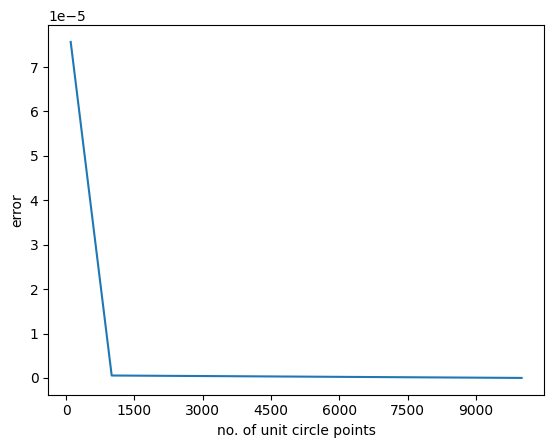

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
np.random.seed(0)

errors = []
for j in range(2, 5):
    N = int(10 ** j)  # No. of points on the unit circle
    t = np.linspace(-1, 1, N)
    unit_circle = np.stack([np.cos(2*np.pi*t), np.sin(2*np.pi*t)], axis=0)
    A = np.random.randn(2, 2)
    outputs = A @ unit_circle
    op_norm    = np.linalg.norm(A @ unit_circle, axis=0).max()
    op_norm_np = np.linalg.norm(A, 2)
    errors.append(abs(op_norm - op_norm_np))

# plot errors
ax = plt.figure().gca()
ax.plot([10**j for j in range(2, 5)], errors)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel('error')
ax.set_xlabel('no. of unit circle points');